# Инструментальные средства ИИ
# Лабораторная работа 3
## Касаткина В.Д. группа N4170

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [2]:
digits = load_digits()#Загружаем датасет 

In [3]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

Дынные являются предварительно обработанными.

digits.data - предикторы 

digits.target - отклики 

In [4]:
#Делим на тестовую и обучающую 
X_train, X_test, y_train, y_test = train_test_split(digits.data, 
                                                    digits.target, 
                                                    test_size= 0.3,
                                                    random_state=26791)
#Определяем и тренируем модель 
knn = KNeighborsClassifier().fit(X_train, y_train)
#Предсказываем значения 
pred = knn.predict(X_test)

In [5]:
#Вывод неверно классифицированных обьектов 
for i in range(len(y_test)):
    if pred[i] != y_test[i]:
        print('---------------------------------------------')
        print('Предсказанное - ', pred[i], '\nРеальное - ', 
              y_test[i], '\nИндекс элемента - ', i )

---------------------------------------------
Предсказанное -  7 
Реальное -  3 
Индекс элемента -  42
---------------------------------------------
Предсказанное -  1 
Реальное -  8 
Индекс элемента -  91
---------------------------------------------
Предсказанное -  1 
Реальное -  8 
Индекс элемента -  117
---------------------------------------------
Предсказанное -  9 
Реальное -  5 
Индекс элемента -  159
---------------------------------------------
Предсказанное -  7 
Реальное -  3 
Индекс элемента -  263
---------------------------------------------
Предсказанное -  9 
Реальное -  5 
Индекс элемента -  290
---------------------------------------------
Предсказанное -  5 
Реальное -  9 
Индекс элемента -  364
---------------------------------------------
Предсказанное -  3 
Реальное -  8 
Индекс элемента -  386


In [6]:
print('точность прогнозирования - ', knn.score(X_test, y_test))

точность прогнозирования -  0.9851851851851852


In [7]:
#Матрица несоответствий 
confusion_matrix(y_test, pred)

array([[48,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 56,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 59,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 63,  0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0, 55,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 43,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 61,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 55,  0,  0],
       [ 0,  2,  0,  1,  0,  0,  0,  0, 48,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 44]], dtype=int64)

2 неправильно классифицированных '8' как '1'

1 неправильно классифицированных '8' как '3'

1 неправильно классифицированных '9' как '5'

2 неправильно классифицированных '3' как '7'

2 неправильно классифицированных '5' как '9'


In [8]:
#Отчет по показателям эффективности модели 
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       0.97      1.00      0.98        56
           2       1.00      1.00      1.00        59
           3       0.98      0.97      0.98        65
           4       1.00      1.00      1.00        55
           5       0.98      0.96      0.97        45
           6       1.00      1.00      1.00        61
           7       0.96      1.00      0.98        55
           8       1.00      0.94      0.97        51
           9       0.96      0.98      0.97        45

    accuracy                           0.99       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.99      0.99      0.99       540



<AxesSubplot:>

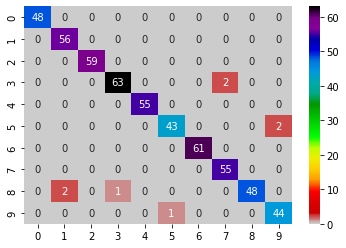

In [9]:
#Матрица несоответствий, но красивая 
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, pred)), 
            annot=True, cmap='nipy_spectral_r')

In [10]:
#Показатели при перекрестной проверке 
score = cross_val_score(estimator=knn, X=digits.data, y=digits.target, 
                cv = KFold(n_splits=10, random_state=1821, shuffle=True))
print('Показатели точности:\n', score)
print('Средняя точность - ', score.mean())
print('Стандартное отклонение - ', score.std())

Показатели точности:
 [0.99444444 0.98888889 0.99444444 0.98888889 0.98333333 0.97222222
 0.99444444 0.98882682 0.98324022 1.        ]
Средняя точность -  0.9888733705772813
Стандартное отклонение -  0.007460564482789046


In [11]:
#Оценка разных методов 
estimators = {'KNeighborsClassifier': knn, 'SVC': SVC(gamma='scale'), 
              'GaussianNB': GaussianNB()}
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=1821, shuffle=True)
    scores = cross_val_score(estimator=estimator_object,X=digits.data, 
                             y=digits.target, cv=kfold)
    print(estimator_name, ': mean accuracy =', scores.mean().round(2),  '; standard deviation =', scores.std().round(2))

KNeighborsClassifier : mean accuracy = 0.99 ; standard deviation = 0.01
SVC : mean accuracy = 0.99 ; standard deviation = 0.01
GaussianNB : mean accuracy = 0.84 ; standard deviation = 0.03


In [12]:
#Поиск оптимального количества соседей 
for k in range (1, 20):
    val = cross_val_score(estimator=KNeighborsClassifier(n_neighbors=k),
                              X=digits.data,y=digits.target, 
                              cv=KFold(n_splits=10, random_state=1821, 
                                       shuffle=True))
    print(f'k= %s ; mean accuracy= %s; standard deviation= %s' 
          %(k, val.mean().round(4), val.std().round(4)))

k= 1 ; mean accuracy= 0.9883; standard deviation= 0.0107
k= 2 ; mean accuracy= 0.9861; standard deviation= 0.0106
k= 3 ; mean accuracy= 0.9889; standard deviation= 0.0086
k= 4 ; mean accuracy= 0.9883; standard deviation= 0.008
k= 5 ; mean accuracy= 0.9889; standard deviation= 0.0075
k= 6 ; mean accuracy= 0.985; standard deviation= 0.0075
k= 7 ; mean accuracy= 0.9855; standard deviation= 0.0087
k= 8 ; mean accuracy= 0.9855; standard deviation= 0.0083
k= 9 ; mean accuracy= 0.9861; standard deviation= 0.0087
k= 10 ; mean accuracy= 0.9828; standard deviation= 0.0094
k= 11 ; mean accuracy= 0.9827; standard deviation= 0.0084
k= 12 ; mean accuracy= 0.9822; standard deviation= 0.0082
k= 13 ; mean accuracy= 0.9811; standard deviation= 0.0087
k= 14 ; mean accuracy= 0.9788; standard deviation= 0.0102
k= 15 ; mean accuracy= 0.9794; standard deviation= 0.0109
k= 16 ; mean accuracy= 0.98; standard deviation= 0.01
k= 17 ; mean accuracy= 0.9788; standard deviation= 0.0114
k= 18 ; mean accuracy= 0.9805

Наилучший результат 

k= 5 ; mean accuracy= 0.9889; standard deviation= 0.0075